- Câu hỏi: Tổ hợp thể loại phổ biến nào được đánh giá cao?
- Lợi ích:
    1. Hiểu rõ thị hiếu của người xem
    2. Các nhà sản xuất có thể tập trung vào các tổ hợp thể loại phổ biến và được đánh giá cao để tối ưu hóa nội dung.
    3. Xác định những tổ hợp mang lại giá trị cao hơn về mặt nội dung hoặc có khả năng tạo ra điểm đánh giá tốt.
    4. Phân tích xu hướng của các thể loại
- Các bước thực hiện:
    1. Chuẩn hóa dữ liệu: xóa các sampe có Score null, loại bỏ thể loại không mang lại giá trị phân tích như UNKNOWN
    2. Nhóm dữ liệu theo Genres
    3. Thực hiện phân tích:
        - Phân tích biểu đồ top 10 thể loại có số lượng nhiều nhất.
        - Phân tích biểu đồ số lượng của top 10 thể loại trên trong vòng 20 năm trở lại đây. 
        - Phân tích biểu đồ đường điểm trung bình của top 10 phim trên theo thời gian trong vòng 20 năm trở lại đây.
        - Phân tích biểu đồ phân phối điểm của 10 tổ hợp thể loại trên trong 5 năm gần nhất.

# Đọc dữ liệu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [2]:
df = pd.read_csv('anime_genres_encoded.csv')

In [3]:
df.head()

,ID,Title,Episodes,Type,Aired,Producers,Studios,Source,Genres,Duration,...,Hentai,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense,UNKNOWN
0,1.0,Cowboy Bebop,26.0,TV,"Apr 3, 1998 to Apr 24, 1999",Bandai Visual,Sunrise,Original,"Action, Award Winning, Sci-Fi",24 min. per ep.,...,0,0,0,0,1,0,0,0,0,0
1,5.0,Cowboy Bebop: Tengoku no Tobira,1.0,Movie,"Sep 1, 2001","Sunrise, Bandai Visual",Bones,Original,"Action, Sci-Fi",1 hr. 55 min.,...,0,0,0,0,1,0,0,0,0,0
2,6.0,Trigun,26.0,TV,"Apr 1, 1998 to Sep 30, 1998",Victor Entertainment,Madhouse,Manga,"Action, Adventure, Sci-Fi",24 min. per ep.,...,0,0,0,0,1,0,0,0,0,0
3,7.0,Witch Hunter Robin,26.0,TV,"Jul 3, 2002 to Dec 25, 2002","Bandai Visual, Dentsu, Victor Entertainment",Sunrise,Original,"Action, Drama, Mystery, Supernatural",25 min. per ep.,...,0,0,1,0,0,0,0,1,0,0
4,8.0,Bouken Ou Beet,52.0,TV,"Sep 30, 2004 to Sep 29, 2005","TV Tokyo, Dentsu",Toei Animation,Manga,"Action, Adventure, Fantasy",23 min. per ep.,...,0,0,0,0,0,0,0,0,0,0


# Tiền xử lý

In [4]:
print("Missing values:")
print(df[['Score']].isnull().sum())

Missing values:
Score    8047
dtype: int64


In [5]:
df = df.dropna(subset=['Score'])

print("Missing values after cleaning:")
print(df['Score'].isnull().sum())

Missing values after cleaning:
0


In [6]:
def extract_year(aired):
    try:
        # Nếu có khoảng thời gian
        if "to" in aired:  
            start_date = aired.split("to")[0].strip()  # Lấy ngày bắt đầu
            year = parser.parse(start_date, fuzzy=True).year  # Trích xuất năm
        else:  # Nếu chỉ có một ngày duy nhất
            year = parser.parse(aired, fuzzy=True).year  # Trích xuất năm từ ngày
        return year
    except (ValueError, TypeError):  # Xử lý lỗi không hợp lệ
        return np.nan  # Trả về NaN nếu không thể xử lý

# Áp dụng hàm trích xuất năm
df["Year"] = df["Aired"].apply(extract_year)
# Loại bỏ các hàng có giá trị "NaN" trong cột "Year"
df = df.dropna(subset=["Year"])
df.shape

(16932, 37)

In [7]:
df = df[~df['Genres'].str.contains('UNKNOWN', na=False)]

In [8]:
print(len(df['Genres']))

8949


# Phân tích

## Các tổ hợp thể loại phổ biến được sản xuất nhiều

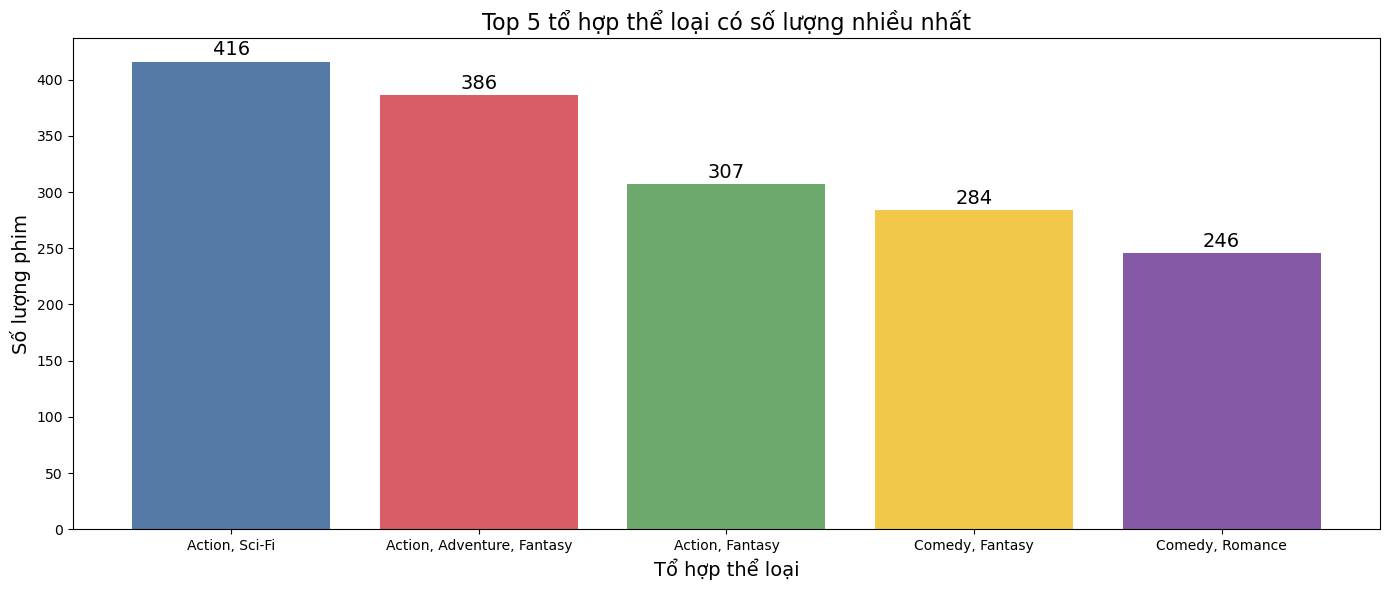

In [9]:
# Đếm số lượng phim theo tổ hợp thể loại trong cột 'Genres'
genre_combinations = df['Genres'].value_counts().sort_values(ascending=False)

# Lấy top 5 tổ hợp thể loại
top_5_combinations = genre_combinations.head(5)

colors = ['#547AA5', '#D95D67', '#6DA96C', '#F2C84B', '#8559A5']

# Vẽ biểu đồ
plt.figure(figsize=(14, 6))
bars = plt.bar(top_5_combinations.index, top_5_combinations.values, color=colors)

# Thêm số lượng trên đầu mỗi cột
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 2,
        int(bar.get_height()),
        ha='center', va='bottom', fontsize=14
    )

# Cấu hình biểu đồ
plt.title('Top 5 tổ hợp thể loại có số lượng nhiều nhất', fontsize=16)
plt.xlabel('Tổ hợp thể loại', fontsize=14)
plt.ylabel('Số lượng phim', fontsize=14)
plt.xticks(ha='center')
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()



- Tổ hợp thể loại có số lượng nhiều nhất là Action, Sci-Fi với 416 bộ phim. Đây là tổ hợp thể loại được sản xuất nhiều nhất. Lý do có thể là do hai thể loại này được khán giả ưa chuộng với những cảnh hành động mãn nhãn kết hợp với các yếu tố khoa học viễn tưởng thú vị. Action, Adventure, Fantasy đứng thứ hai với 386 bộ phim và Action, Fantasy đứng thứ ba với 307 bộ phim. Vẫn là xu hướng hành động kết hợp các yếu tố thú vị như phiêu lưu và giả tưởng. Tiếp theo đó là Comedy, Fantasy và Comedy, Romance với số lượng lần lượt là 84, 246 mang đậm tính hài hước cho thấy khán giả vẫn yêu thích các thể loại nhẹ nhàng, lãng mạn và giải trí. Hai tổ hợp này có số lượng ít hơn so với các thể loại hành động, nhưng vẫn giữ được sự hiện diện mạnh mẽ.

- Các tổ hợp trong top 5 không quá chênh lệch nhau nhau từ 246 đến 416 bộ phim. Ta có thể suy ra rằng các tổ hợp thể loại trên được sản xuất một số lượng đáng kể hướng đến những tệp khán giả khác nhau.

- Các thể loại xuất hiện phổ biến nhất bao gồm hành động (Action), khoa học viễn tưởng (Sci-Fi), và giả tưởng (Fantasy). Điều này cho thấy các nhà sản xuất thường tập trung vào các nội dung có yếu tố bất ngờ, sáng tạo và kích thích trí tưởng tượng.

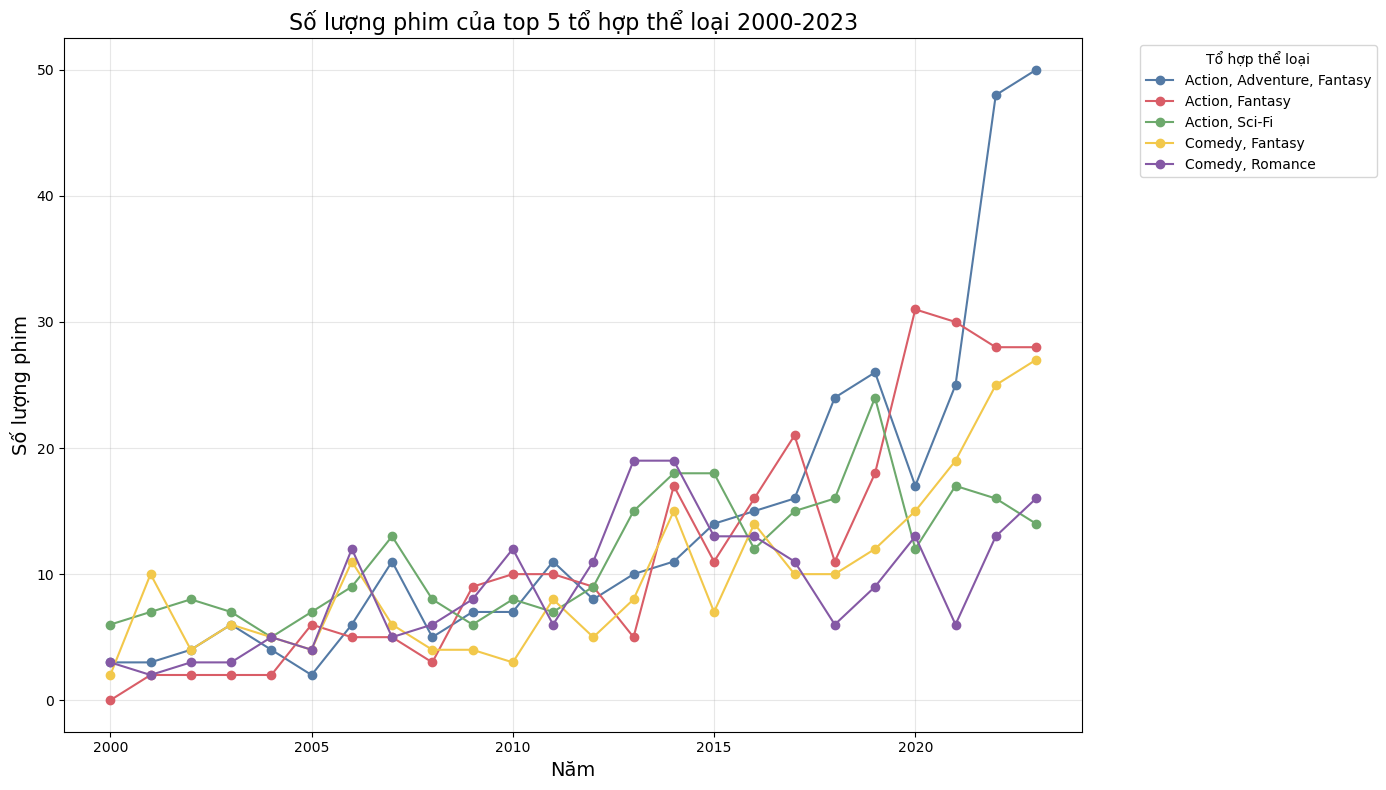

In [10]:
# Lọc dữ liệu trong vòng 20 năm trở lại đây, không tính năm hiện tại
current_year = pd.Timestamp.now().year
df_recent_20_years = df[(df['Year'] >= (current_year - 24)) & (df['Year'] < current_year)]

# Lọc dữ liệu cho top 10 tổ hợp thể loại
top_5_genres = top_5_combinations.index  # Lấy danh sách top 10 thể loại từ top_10_combinations
df_top_5_recent = df_recent_20_years[df_recent_20_years['Genres'].isin(top_5_genres)]

# Tính số lượng phim theo năm và thể loại
genre_counts_by_year = df_top_5_recent.groupby(['Year', 'Genres']).size().unstack(fill_value=0)

# Vẽ biểu đồ đường
i = 0
plt.figure(figsize=(14, 8))
for genre in genre_counts_by_year.columns:
    plt.plot(genre_counts_by_year.index, genre_counts_by_year[genre], label=genre, marker='o', color = colors[i])                  
    i += 1

# Cấu hình biểu đồ
plt.title('Số lượng phim của top 5 tổ hợp thể loại 2000-2023', fontsize=16)
plt.xlabel('Năm', fontsize=14)
plt.ylabel('Số lượng phim', fontsize=14)
plt.legend(title='Tổ hợp thể loại', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


- Biểu đồ thể hiện xu hướng tăng trưởng rõ rệt. Hầu hết các tổ hợp thể loại đều có xu hướng tăng trưởng đặc biệt nhất là tổ hợp Action, Adventure, Fantasy có sự gia tăng đột phá từ năm 2020 trở đi, vượt trội hơn hẳn so với các tổ hợp khác đạt mức 50 bộ phim vào năm 2023 cho thấy sự chuyển hướng mạnh mẽ của các nhà sản xuất anime sang các thể loại kết hợp phiêu lưu, giả tưởng và hành động.
- Phân tích từng thể loại:
    - Ation, Adventure, Fantasy có đà tăng trưởng liên tục từ những năm 2000. Có sự suy giảm từ năm 2019 - 2022 nhưng đã trở lại đột phá trong các năm 2020 - 2023, đặc biệt 2021 - 2022 tăng từ 25 phim lên 48 phim, tăng trưởng gần gấp đôi và đạt 50 phim vào năm 2023. Đây là một sự phát triển vô cùng ấn tượng của thể loại này.

    - Từ con số 0 vào năm 2000, thể loại Action, Fantasy tăng trưởng liên tục và đạt 28 phim vào năm 2023. Tuy nhiên, thể loại này trải qua sự suy giảm số lượng đáng kể trong giai đoạn 2017-2018 trước khi quay lại đà tăng trưởng từ 2018 đến 2020 và bão hòa trong giai đoạn 2020-2023.

    - Dẫn đầu vào những năm đầu thập kỷ 2000 và giữ vị trí cao qua nhiều năm như 2002, 2003, 2005,... với đỉnh cao 24 phim vào năm 2019. Tuy nhiên, từ 2020 trở đi, thể loại này bước vào giai đoạn bão hòa và có dấu hiệu suy giảm so với các tổ hợp khác. Điều này có thể phản ánh những khó khăn trong việc lên các ý tưởng kết hợp yếu tố khoa học viễn tưởng bởi nó không chỉ yêu cầu sự sáng tạo đơn thuần mà phải dựa trên nền tảng khoa học.

    - Comedy, Fantasy tăng trưởng ổn định và có sự đột phá sau năm 2017 cho thấy xu hướng khán giả ngày càng yêu thích các bộ phim hài hước kết hợp yếu tố giả tưởng.

    - Comedy, Romance ổn định qua các năm 2010-2023, không có sự bùng nổ lớn về số lượng nhưng vẫn duy trì được sự hiện diện đều đặn hướng đến nhóm khán giả yêu thích sự nhẹ nhàng và lãng mạn.

- Biểu đồ đã thể hiện rõ xu hướng tăng trưởng của các tổ hợp thể loại phim qua thời gian, đặc biệt là sự bùng nổ của các thể loại kết hợp hành động, phiêu lưu và giả tưởng trong những năm gần đây. Mặc dù, thể loại hài kịch không bùng nổ về số lượng, các thể loại hài hước và lãng mạn vẫn giữ vị trí quan trọng hướng đến những khán giả yêu thích sự nhẹ nhàng và giải trí. Thị trường phim đang ngày càng đáp ứng thị hiếu của khán giả yêu thích sự sáng tạo và giải trí đa dạng.

## Chất lượng hay điểm đánh giá của các tổ hợp thể loại trên

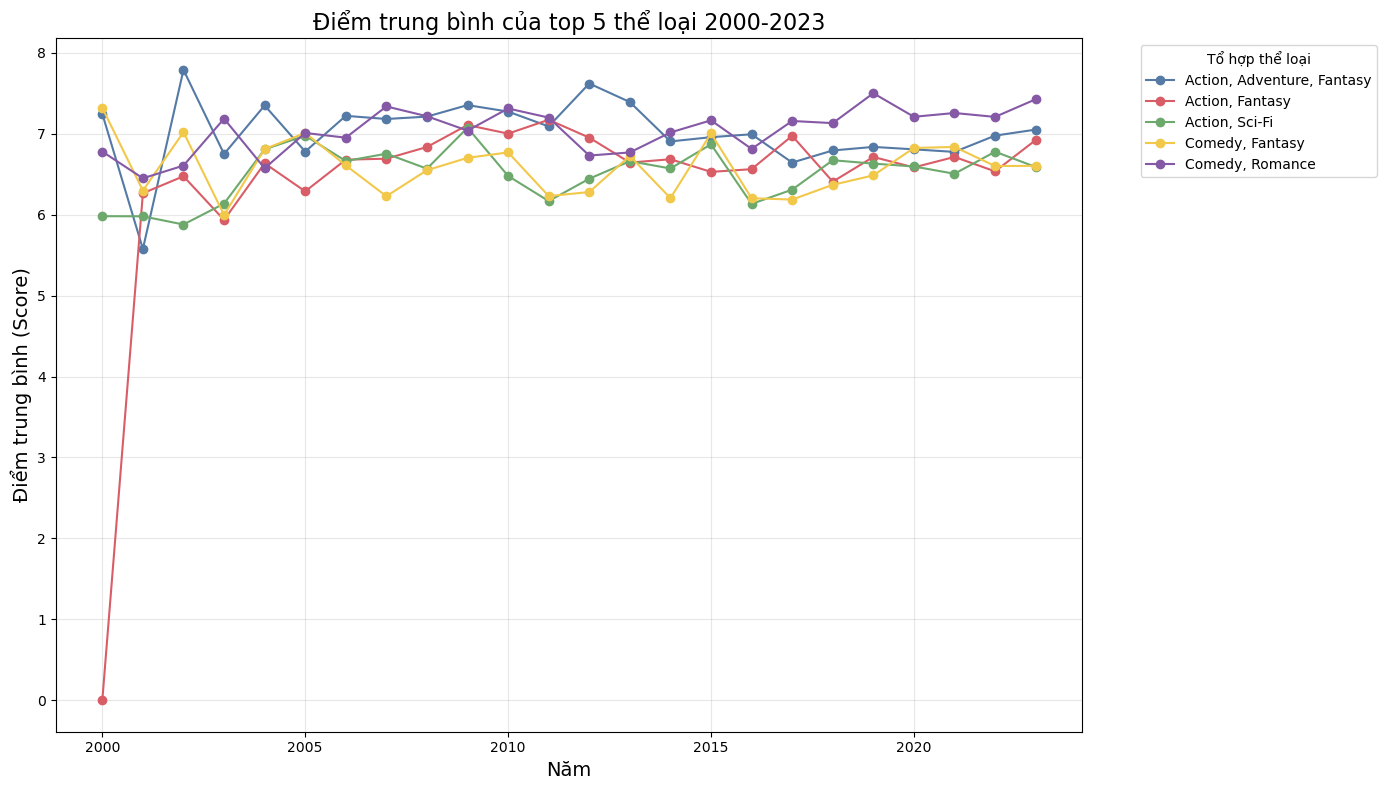

In [11]:
# Tính điểm trung bình theo năm và thể loại
avg_scores_by_year = df_top_5_recent.groupby(['Year', 'Genres'])['Score'].mean().unstack(fill_value=0)

# Vẽ biểu đồ đường
i = 0
plt.figure(figsize=(14, 8))
for genre in avg_scores_by_year.columns:
    plt.plot(avg_scores_by_year.index, avg_scores_by_year[genre], label=genre, marker='o', color = colors[i])
    i += 1

# Cấu hình biểu đồ
plt.title('Điểm trung bình của top 5 thể loại 2000-2023', fontsize=16)
plt.xlabel('Năm', fontsize=14)
plt.ylabel('Điểm trung bình (Score)', fontsize=14)
plt.legend(title='Tổ hợp thể loại', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


- Điểm trung bình ổn định: Hầu hết các tổ hợp thể loại có điểm trung bình dao động trong khoảng từ 6.5 đến 7.5 trong phần lớn thời gian. Điều này cho thấy các tổ hợp này duy trì được chất lượng ổn định, phù hợp với thị hiếu khán giả qua các năm.
- Điểm bất thường vào năm 2000: Tổ hợp Comedy, Fantasy có một điểm bất thường rõ rệt với điểm trung bình rất thấp (0). Điều này là do vào thời điểm đó chưa có phim có thể loại này.
- Từ năm 2005 - 2017, cả 5 tổ hợp có sự đồng đều hơn về điểm trung bình. Không có tổ hợp nào vượt trội hoàn toàn về điểm trung bình so với phần còn lại. Từ sau 2017, tổ hợp Comedy, Romance có điểm trung bình nhinh hơn so với 4 tổ hợp còn lại. Đây có thể là do thị hiếu của khán giả thay đổi từ các phim hành động kịch tính sang các phim nhẹ nhàng tình cảm.
- Điểm trung bình duy trì ổn định trong hơn 20 năm qua cho thấy các tổ hợp này được sản xuất với chất lượng đáng tin cậy và phù hợp với kỳ vọng của khán giả. Các nhà sản xuất có thể cần cân nhắc đầu tư vào những tổ hợp có điểm cao và xu hướng tăng trưởng gần đây để duy trì sự quan tâm của người xem.

## Phân bố điểm của từng tổ hợp thể loại trên

In [12]:
current_year = pd.Timestamp.now().year
df_recent_5_years = df[(df['Year'] >= (current_year - 5)) & (df['Year'] < current_year)]

In [13]:
def histogram_over_years(genre, color='skyblue'):
    genre_data = df_recent_5_years[df_recent_5_years['Genres'] == genre]

    # Thiết lập khung hình cho 5 histogram
    fig, axes = plt.subplots(5, 1, figsize=(12, 20), sharex=True)
    fig.suptitle(f'Phân phối điểm của thể loại {genre}', fontsize=16)

    # Xác định các khoảng giá trị để hiển thị trên trục X
    x_ticks = range(2, 11)  # Nếu điểm nằm trong khoảng 2-10

    for i, year in enumerate(range(current_year - 5, current_year)):
        # Dữ liệu của từng năm
        yearly_data = genre_data[genre_data['Year'] == year]

        # Vẽ histogram
        axes[i].hist(yearly_data['Score'], bins=10, alpha=1, color=color, edgecolor='black')
        axes[i].set_title(f'Năm {year}', fontsize=14)
        axes[i].set_ylabel('Tần suất', fontsize=12)
        axes[i].grid(alpha=0.3)

        # Tính các chỉ số thống kê
        min_value = yearly_data['Score'].min()
        max_value = yearly_data['Score'].max()
        mean = yearly_data['Score'].mean()
        median = yearly_data['Score'].median()
        std = yearly_data['Score'].std()
        q1 = yearly_data['Score'].quantile(0.25)
        q3 = yearly_data['Score'].quantile(0.75)
        iqr = q3 - q1

        # Thêm box chứa thông tin thống kê
        stats_text = (
            f"Min: {min_value:.2f}\n"
            f"Max: {max_value:.2f}\n"
            f"Mean: {mean:.2f}\n"
            f"Median: {median:.2f}\n"
            f"Std: {std:.2f}\n"
            f"Q1: {q1:.2f}\n"
            f"Q3: {q3:.2f}\n"
            f"IQR: {iqr:.2f}"
        )
        axes[i].text(
            1.05, 0.5, stats_text,
            transform=axes[i].transAxes,
            fontsize=12, verticalalignment='center',
            bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgray")
        )

        # Thêm các điểm cụ thể trên trục X
        axes[i].set_xticks(x_ticks)

    # Cấu hình trục X cho histogram cuối cùng
    axes[-1].set_xlabel('Điểm (Score)', fontsize=14)

    # Tăng khoảng cách giữa các biểu đồ và loại bỏ phần thừa bên trái
    plt.subplots_adjust(left=0.1, right=0.85, top=0.95, bottom=0.05)  # Điều chỉnh khoảng cách

    # Hiển thị biểu đồ
    plt.show()

### Action, Sci-Fi

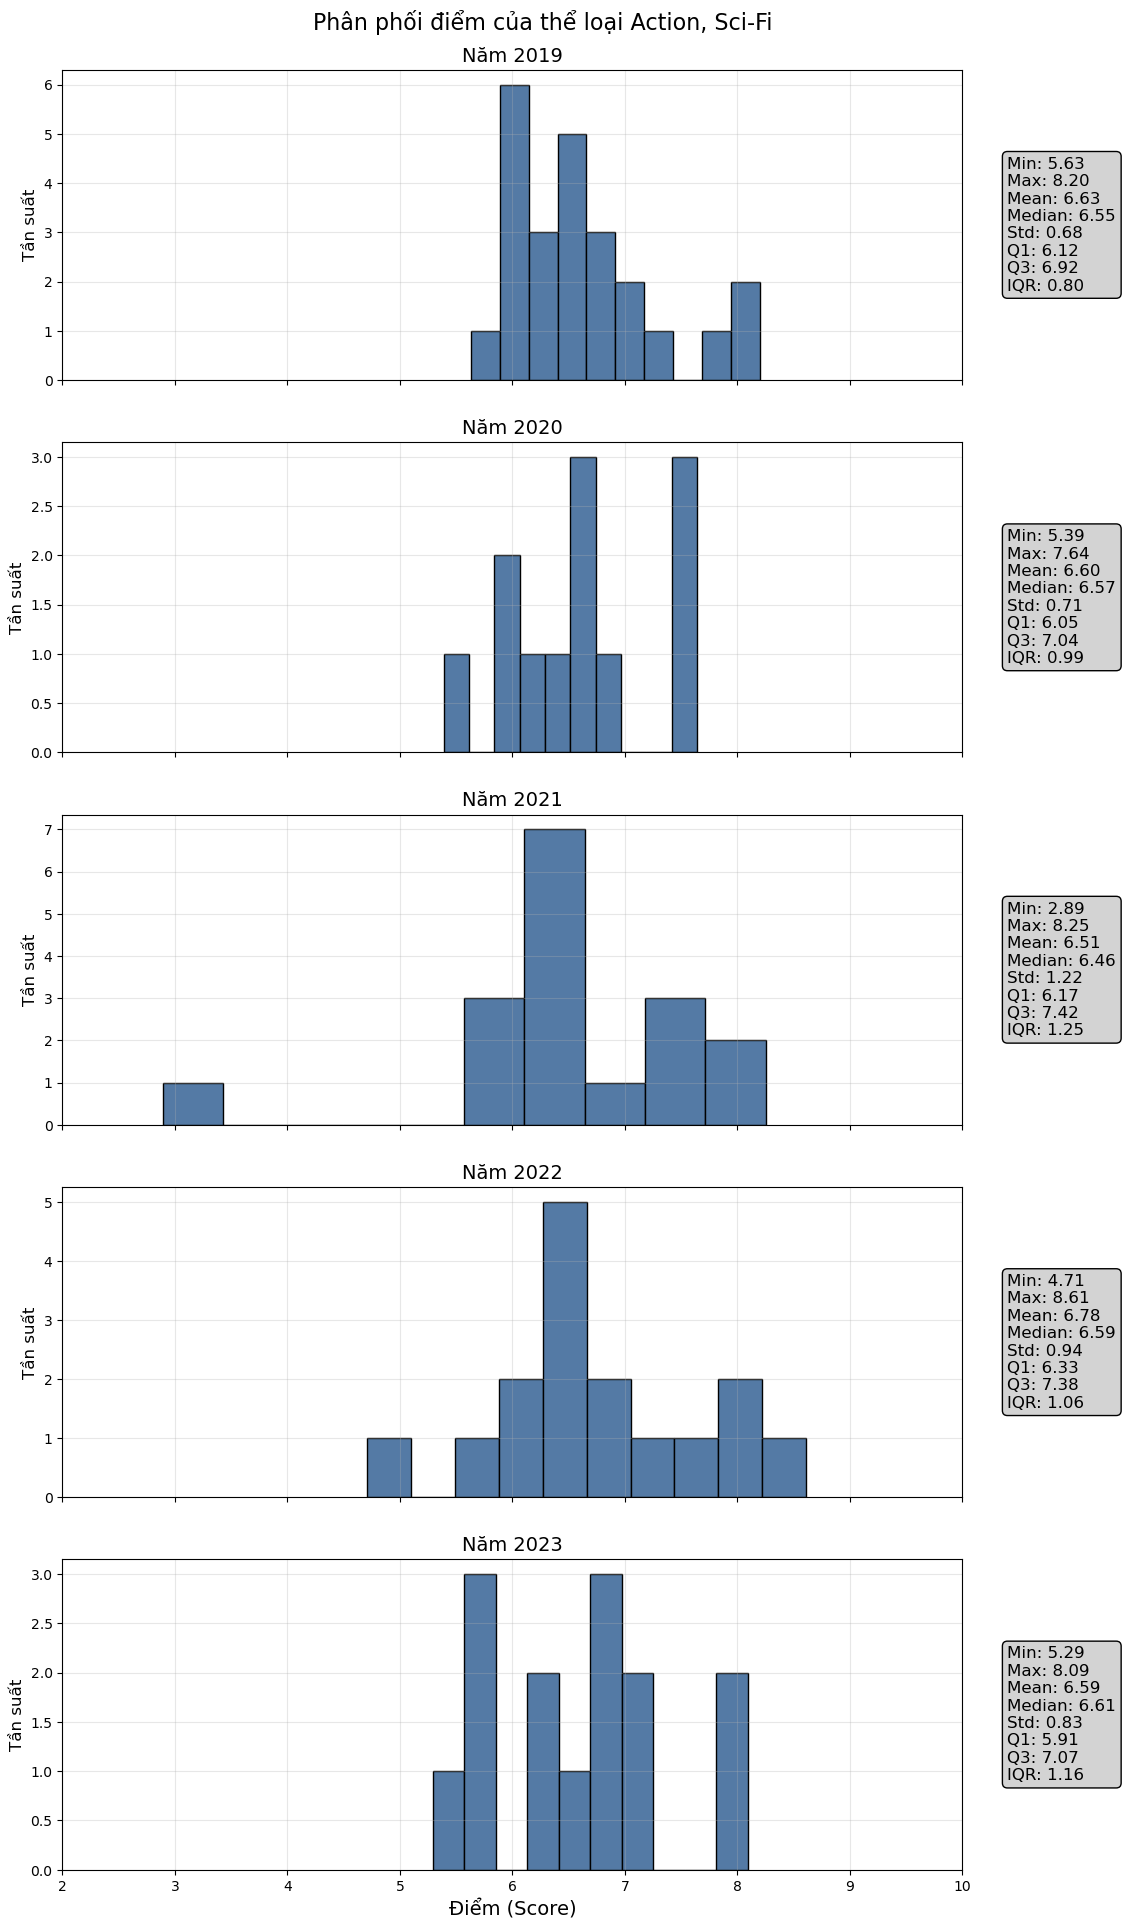

In [14]:
genre = 'Action, Sci-Fi'
histogram_over_years(genre, colors[0])

1. Xu hướng phân phối điểm qua các năm:
- Phân phối điểm của thể loại Action, Sci-Fi trong 5 năm gần nhất (2019-2023) cho thấy sự tập trung điểm chủ yếu nằm trong khoảng từ 6 đến 7.5.
- Trung vị qua các năm có xu hướng ổn định trong khoảng 6.5, điều này cho thấy phần lớn các bộ phim thuộc thể loại này nhận được đánh giá khá đều.
- Điểm trung bình thay đổi không đáng kể qua từng năm, từ mức 6.55 (năm 2019) đến 6.61 (năm 2023). Điều này cho thấy không có nhiều biến động lớn về chất lượng chung của các bộ phim thuộc thể loại này. Điểm trung bình cao nhất rơi vào năm 2022 với giá trị 6.78. Điều này có thể phản ánh rằng các bộ phim ra mắt trong năm này được khán giả đón nhận tích cực hơn.
- Độ lệch chuẩn khá thấp trong tất cả các năm (dưới 1) cho thấy các đánh giá không có nhiều sự chênh lệch lớn.
- IQR (khoảng cách giữa Q1 và Q3) cho thấy phần lớn các bộ phim nằm trong khoảng từ 6 đến 7 điểm, không có sự phân tán quá lớn.
- Phân phối có xu hướng di chuyển dần sang phải, năm 2019 tập trung ở mức 6 điểm chuyển dịch dần sang năm 2023 tập trung ở mức 7 điểm cho thấy rằng số lượng của các bộ phim có chất lượng cao tăng dần qua các năm.
2. Năm đặc biệt:
- Năm 2021 xuất hiện một bộ phim có điểm số thấp (nằm trong khoảng 3 điểm), điều này ảnh hưởng đáng kể đến điểm trung bình và độ lệch chuẩn, làm tăng sự phân tán của các đánh giá trong năm này.
- Các năm khác có mức điểm tối thiểu và tối đa khá sát nhau, phản ánh sự ổn định trong chất lượng đánh giá.
3. Nhận xét tổng quan:
- Phân phối điểm qua 5 năm cho thấy thể loại Action, Sci-Fi có chất lượng tương đối ổn định, không có sự biến động lớn về điểm trung bình hoặc phân phối.
- Năm 2022 có thể được xem là một năm thành công hơn cho thể loại này do điểm trung bình và trung vị đều cao hơn các năm khác. Ta có thể tìm hiểu sâu hơn lý do thành công của các phim trong năm 2022 để áp dụng sản xuất thêm các phim thành công.

### Action, Adventure, Fantasy

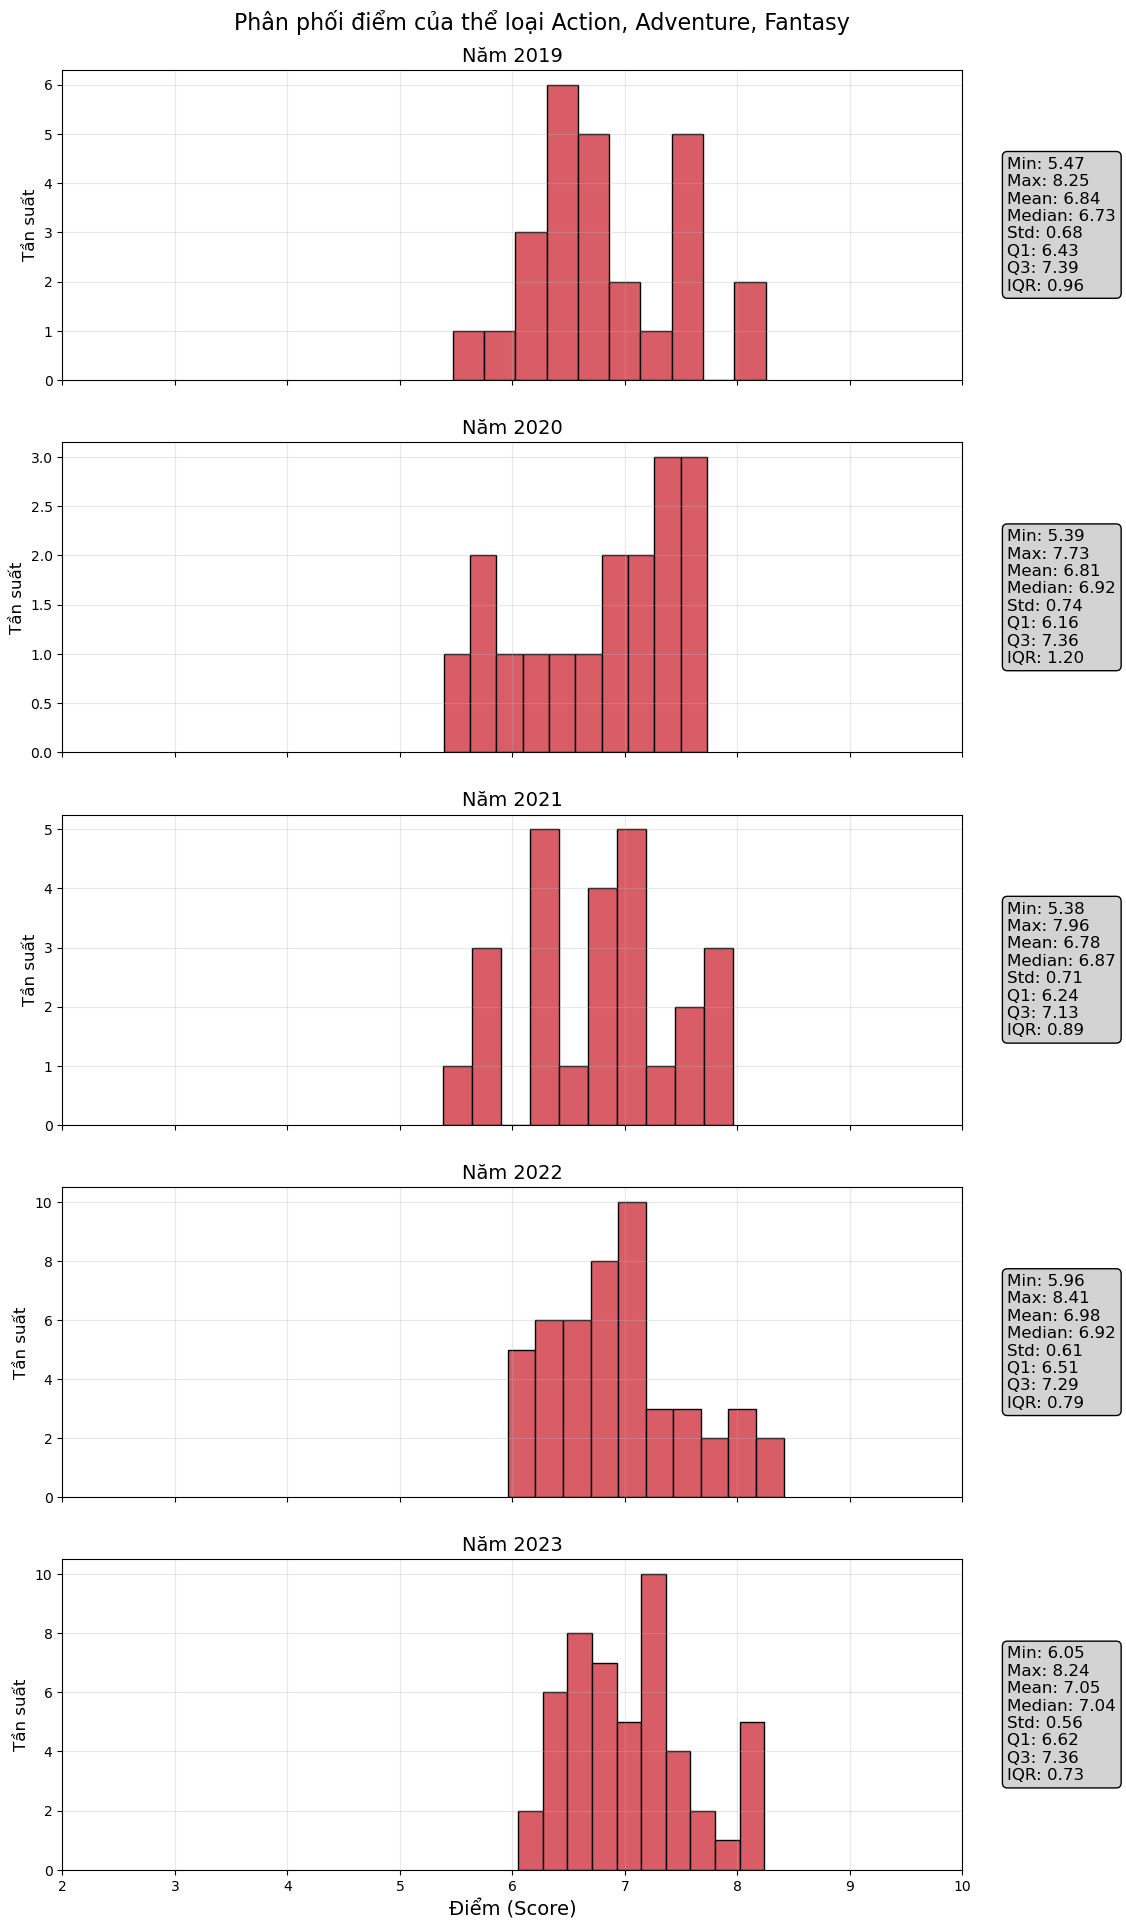

In [15]:
genre = 'Action, Adventure, Fantasy'
histogram_over_years(genre, colors[1])

1. Tổng quan phân bố điểm
- Các năm từ 2019 đến 2023 đều có phân bố điểm tương đối ổn định, tập trung trong khoảng 6.0 - 8.0, với đỉnh cao nhất thường xuất hiện quanh điểm trung bình (6.8 đến 7.0).
- Các chỉ số như mean, median, và IQR (Interquartile Range) cho thấy sự nhất quán về chất lượng phim trong thể loại này qua các năm.
2. Phân tích theo từng năm
- Năm 2019: phim trong năm này có mean là 6.84 và median là 6.73, chứng tỏ phần lớn các phim được đánh giá tốt. Điểm Q1 = 6.43 và Q3 = 7.39 cho thấy khoảng điểm phổ biến (IQR) khá hẹp, điều này thể hiện sự đồng đều trong chất lượng phim.
- Năm 2020: Điểm trung bình và trung vị (6.81 và 6.92) có tăng nhẹ so với 2019. IQR tăng lên (1.20), phản ánh sự phân tán điểm số rộng hơn. Điều này có thể cho thấy một vài phim có chất lượng vượt trội hoặc kém hơn.
- Năm 2021: Trung bình giảm nhẹ còn 6.78, và độ lệch chuẩn tăng lên 0.71. Mặc dù giá trị Q1 và Q3 ổn định, sự xuất hiện của một vài điểm thấp hơn (Min = 5.38) có thể kéo mean xuống.
- Năm 2022: Đây là năm nổi bật với mean tăng lên 6.98, gần đạt mốc 7. Giá trị Q3 = 7.29 cho thấy số lượng phim có điểm cao (>7.29) nhiều hơn so với các năm trước.
- Năm 2023: Mean đạt mức 7.05, cao nhất trong 5 năm, và median sát với mean (7.04), cho thấy sự ổn định. IQR giảm nhẹ còn 0.73, phản ánh sự thu hẹp khoảng cách giữa các phim.
3. Kết luận
- Từ 2020 trở đi, chất lượng của các phim trong thể loại Action, Adventure, Fantasy có xu hướng tăng lên, thể hiện qua các chỉ số mean và median.
- Các chỉ số như IQR và Std (độ lệch chuẩn) phản ánh sự đồng đều ngày càng tốt hơn, đặc biệt là vào năm 2023.
- Cần xem xét các yếu tố ảnh hưởng đến sự tăng điểm trong năm 2022 và 2023, chẳng hạn như chất lượng sản xuất, nội dung hoặc các yếu tố ngoại cảnh (như đại dịch khiến khán giả tập trung hơn vào các thể loại này).

### Action, Fantasy

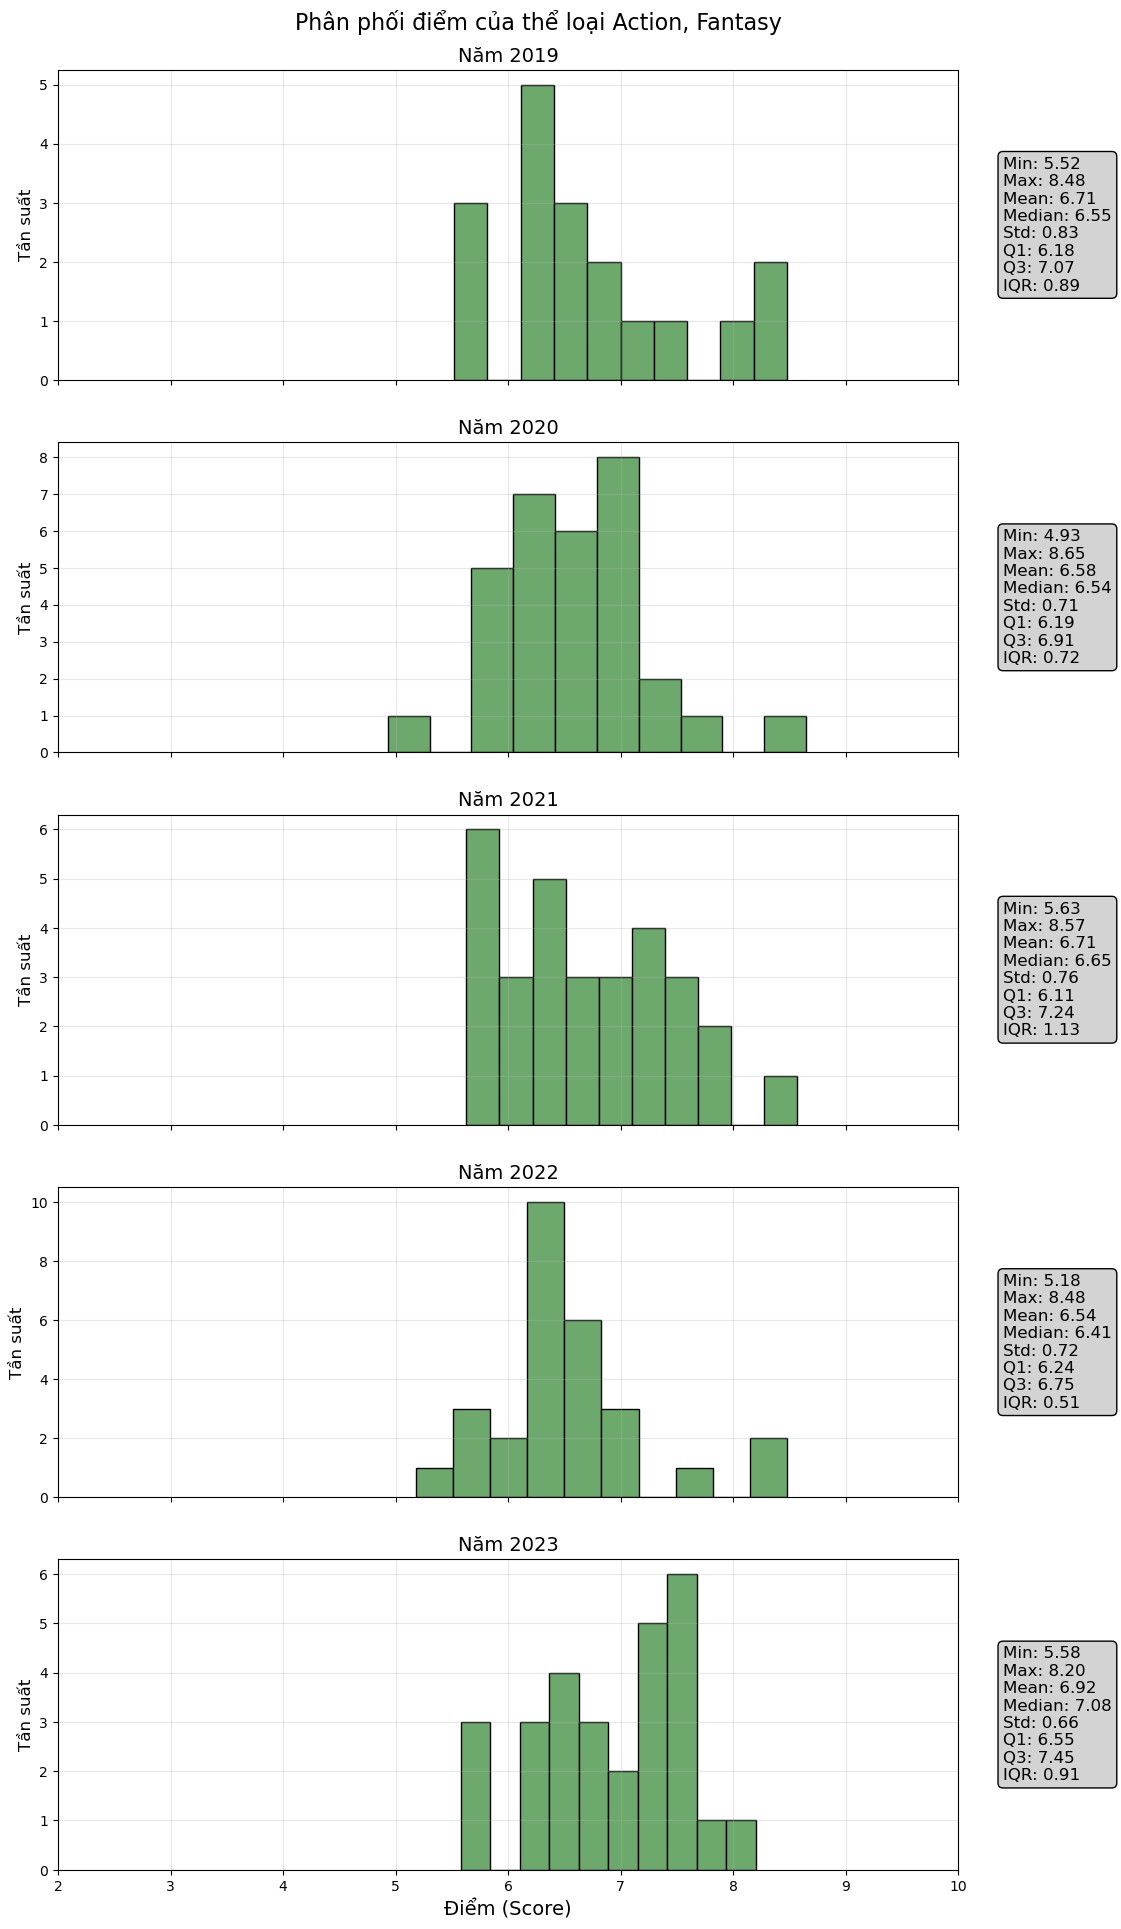

In [16]:
genre = 'Action, Fantasy'
histogram_over_years(genre, colors[2])

1. Phân phối điểm qua các năm:
- Các histogram thể hiện rõ phân phối điểm (Score) của thể loại "Action, Fantasy" qua từng năm từ 2019 đến 2023. Trong mỗi năm:
- Điểm trung bình (Mean) và điểm trung vị (Median) của các bộ phim nằm trong khoảng 6.5 đến 7.0, thể hiện rằng thể loại này duy trì mức đánh giá ổn định và cao.
- Phân vị thứ nhất (Q1) và thứ ba (Q3) cho thấy hầu hết điểm số của các bộ phim tập trung trong khoảng 6.0 đến 7.5, phản ánh mức độ ổn định trong chất lượng của thể loại này.
2. Phân tích qua các năm:
- Năm 2019: Điểm số tập trung cao nhất ở khoảng 6.5 đến 7.0, với độ lệch chuẩn (Std) là 0.83, cho thấy sự đa dạng trong điểm đánh giá.
- Năm 2020: Điểm số vẫn ổn định, tuy nhiên khoảng IQR (0.72) nhỏ hơn so với năm 2019, cho thấy sự thu hẹp trong khoảng cách giữa các bộ phim.
- Năm 2021: Phân phối trải rộng hơn với độ lệch chuẩn tăng lên (0.76), có thể cho thấy sự xuất hiện của một số bộ phim kém chất lượng hoặc xuất sắc vượt trội.
- Năm 2022 và 2023: Điểm trung bình và phân vị tăng nhẹ, phản ánh chất lượng phim ngày càng cải thiện hoặc tiêu chuẩn đánh giá của khán giả thay đổi.
3. Biến động trong chất lượng phim:
- IQR (Interquartile Range) giảm qua các năm (trừ năm 2021), cho thấy sự ổn định hơn về chất lượng các bộ phim.
- Đỉnh histogram ở năm 2023 cho thấy sự tập trung của các phim có điểm số cao trong khoảng 6.5 đến 7.5, cho thấy khán giả có xu hướng đánh giá đồng đều hơn.
4. So sánh các năm:
- Chất lượng phim của thể loại "Action, Fantasy" tăng nhẹ qua từng năm, đặc biệt là các bộ phim từ năm 2022 và 2023 có sự cải thiện rõ rệt về điểm số cao nhất (Max).
- Sự khác biệt nhỏ trong phân phối giữa các năm cho thấy các nhà sản xuất phim đã duy trì chất lượng ổn định hoặc đầu tư nhiều hơn vào thể loại này.

### Comedy, Fantasy

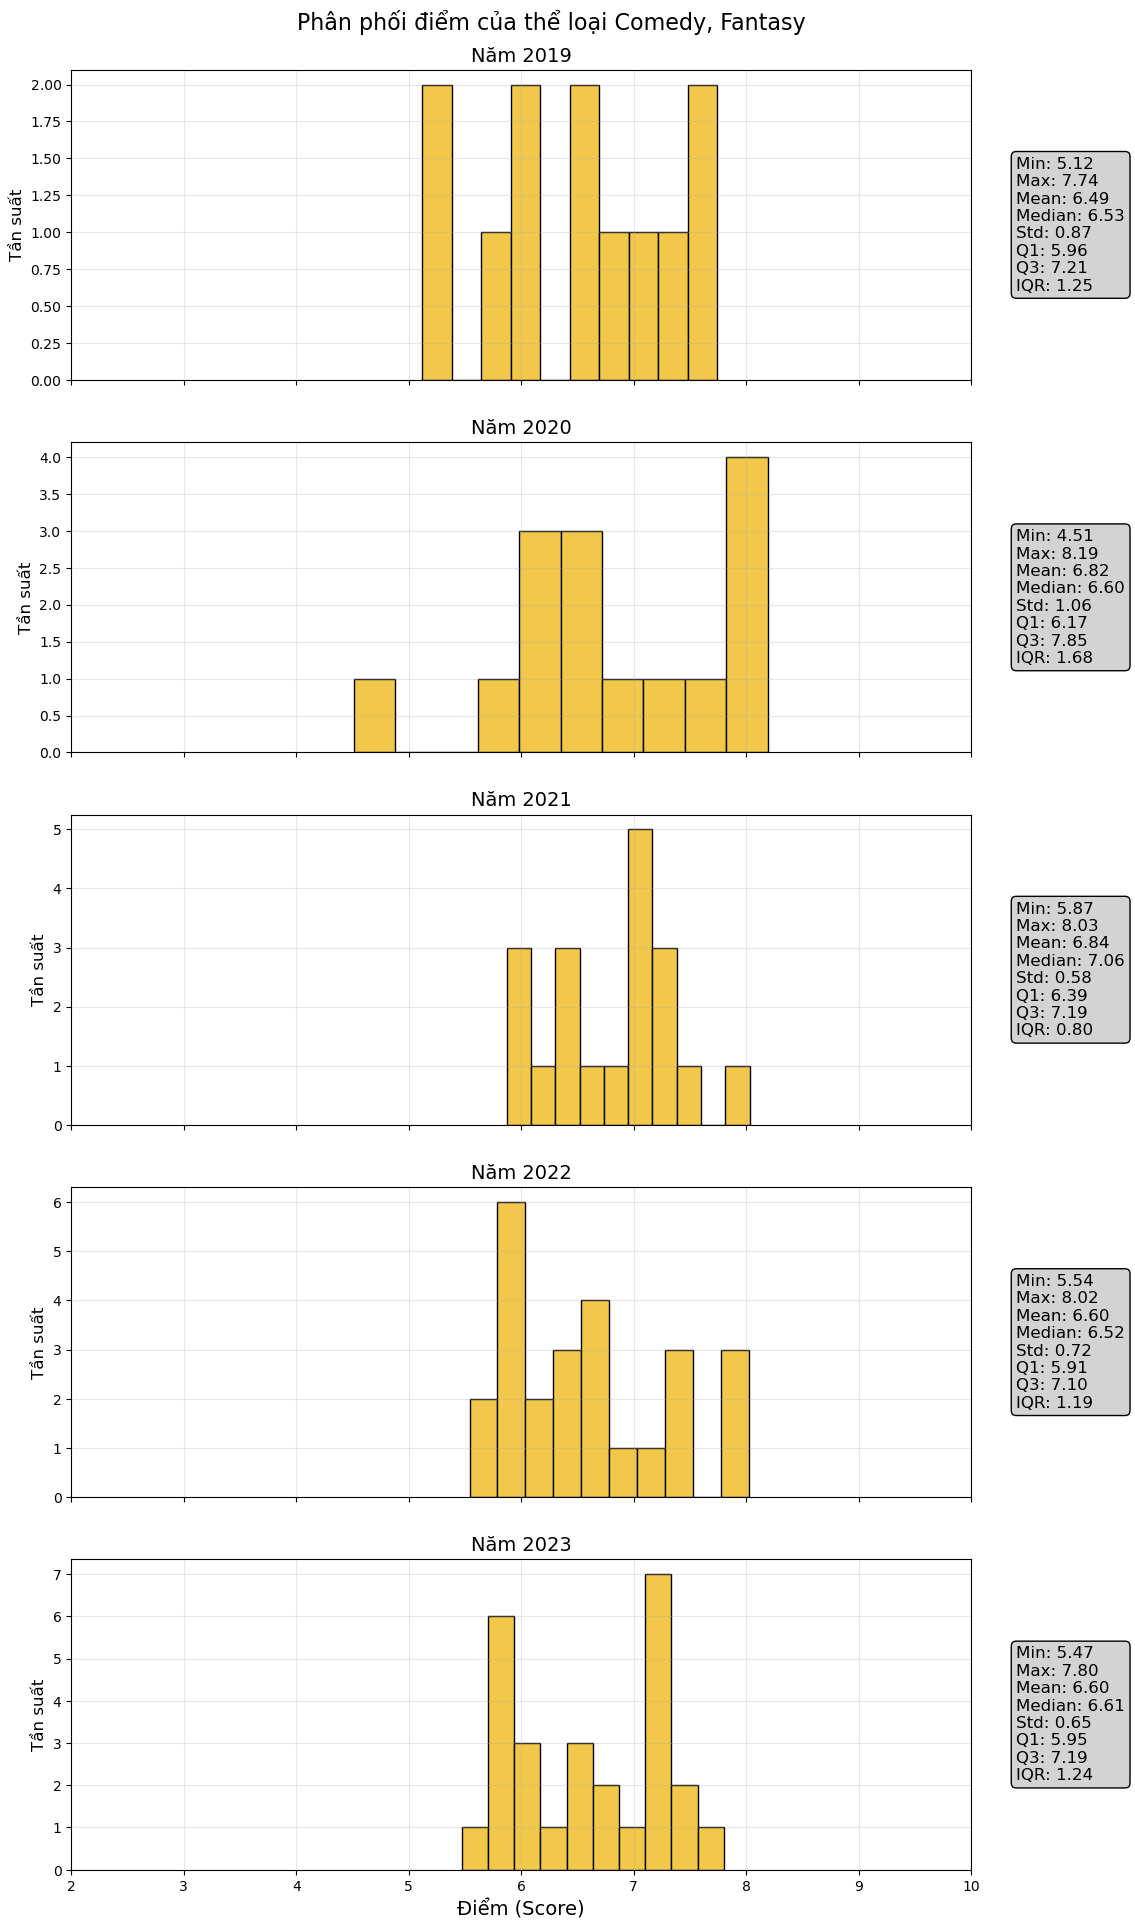

In [17]:
genre = 'Comedy, Fantasy'
histogram_over_years(genre, colors[3])

1. Xu hướng chung về điểm số:
- Các năm từ 2019 đến 2023, điểm số trung bình (Mean) có sự dao động nhẹ trong khoảng từ 6.49 đến 6.84.
- Điểm số trung bình cao nhất là năm 2021 (6.84), trong khi thấp nhất vào năm 2019 (6.49).
- Khoảng dao động (IQR) hầu như ổn định từ năm 2019 đến 2023, cho thấy không có biến động lớn về sự phân tán của điểm số.
2. Phân phối:
- Biểu đồ histogram cho thấy phần lớn điểm số tập trung trong khoảng từ 6 đến 8 cho cả 5 năm.
- Tần suất cao nhất thường thuộc về điểm gần giá trị trung bình và trung vị (Median).
3. Phân tích qua các năm:
- 2019: Điểm cao nhất là 7.74, thấp nhất là 5.12. Trung bình 6.49 với độ lệch chuẩn 0.87. Dữ liệu có sự phân tán vừa phải.
- 2020: Điểm cao nhất tăng lên 8.19, thấp nhất là 4.51. Trung bình tăng lên 6.82, độ lệch chuẩn 1.06 lớn hơn năm 2019. Xuất hiện nhiều hơn các phim có điểm số cao (>8).
- 2021: Điểm cao nhất là 8.03, thấp nhất là 5.87. Trung bình 6.84, tương đối cao và độ lệch chuẩn giảm còn 0.58, cho thấy dữ liệu ít phân tán hơn.
- 2022: Điểm cao nhất là 8.02, thấp nhất là 5.54. Trung bình 6.60 với độ lệch chuẩn 0.72, có sự giảm nhẹ về cả trung bình lẫn phân tán.
- 2023: Điểm cao nhất là 7.80, thấp nhất là 5.47. Trung bình 6.60, IQR là 1.24, dữ liệu có sự phân tán tương tự năm 2020.
4. Kết luận:
- Thể loại Comedy, Fantasy có sự ổn định trong điểm số qua 5 năm gần nhất.
- Mặc dù trung bình điểm số có xu hướng giảm nhẹ từ năm 2021 đến 2023, nhưng không có biến động lớn trong các năm này.
- Điểm cao nhất và thấp nhất cho thấy sự đa dạng của các bộ phim thuộc thể loại này, với một số phim đạt điểm rất cao nhưng vẫn có phim bị đánh giá thấp hơn mức trung bình.
- Đây là một thể loại ổn định về chất lượng, phù hợp với thị hiếu khán giả.

### Comedy, Romance

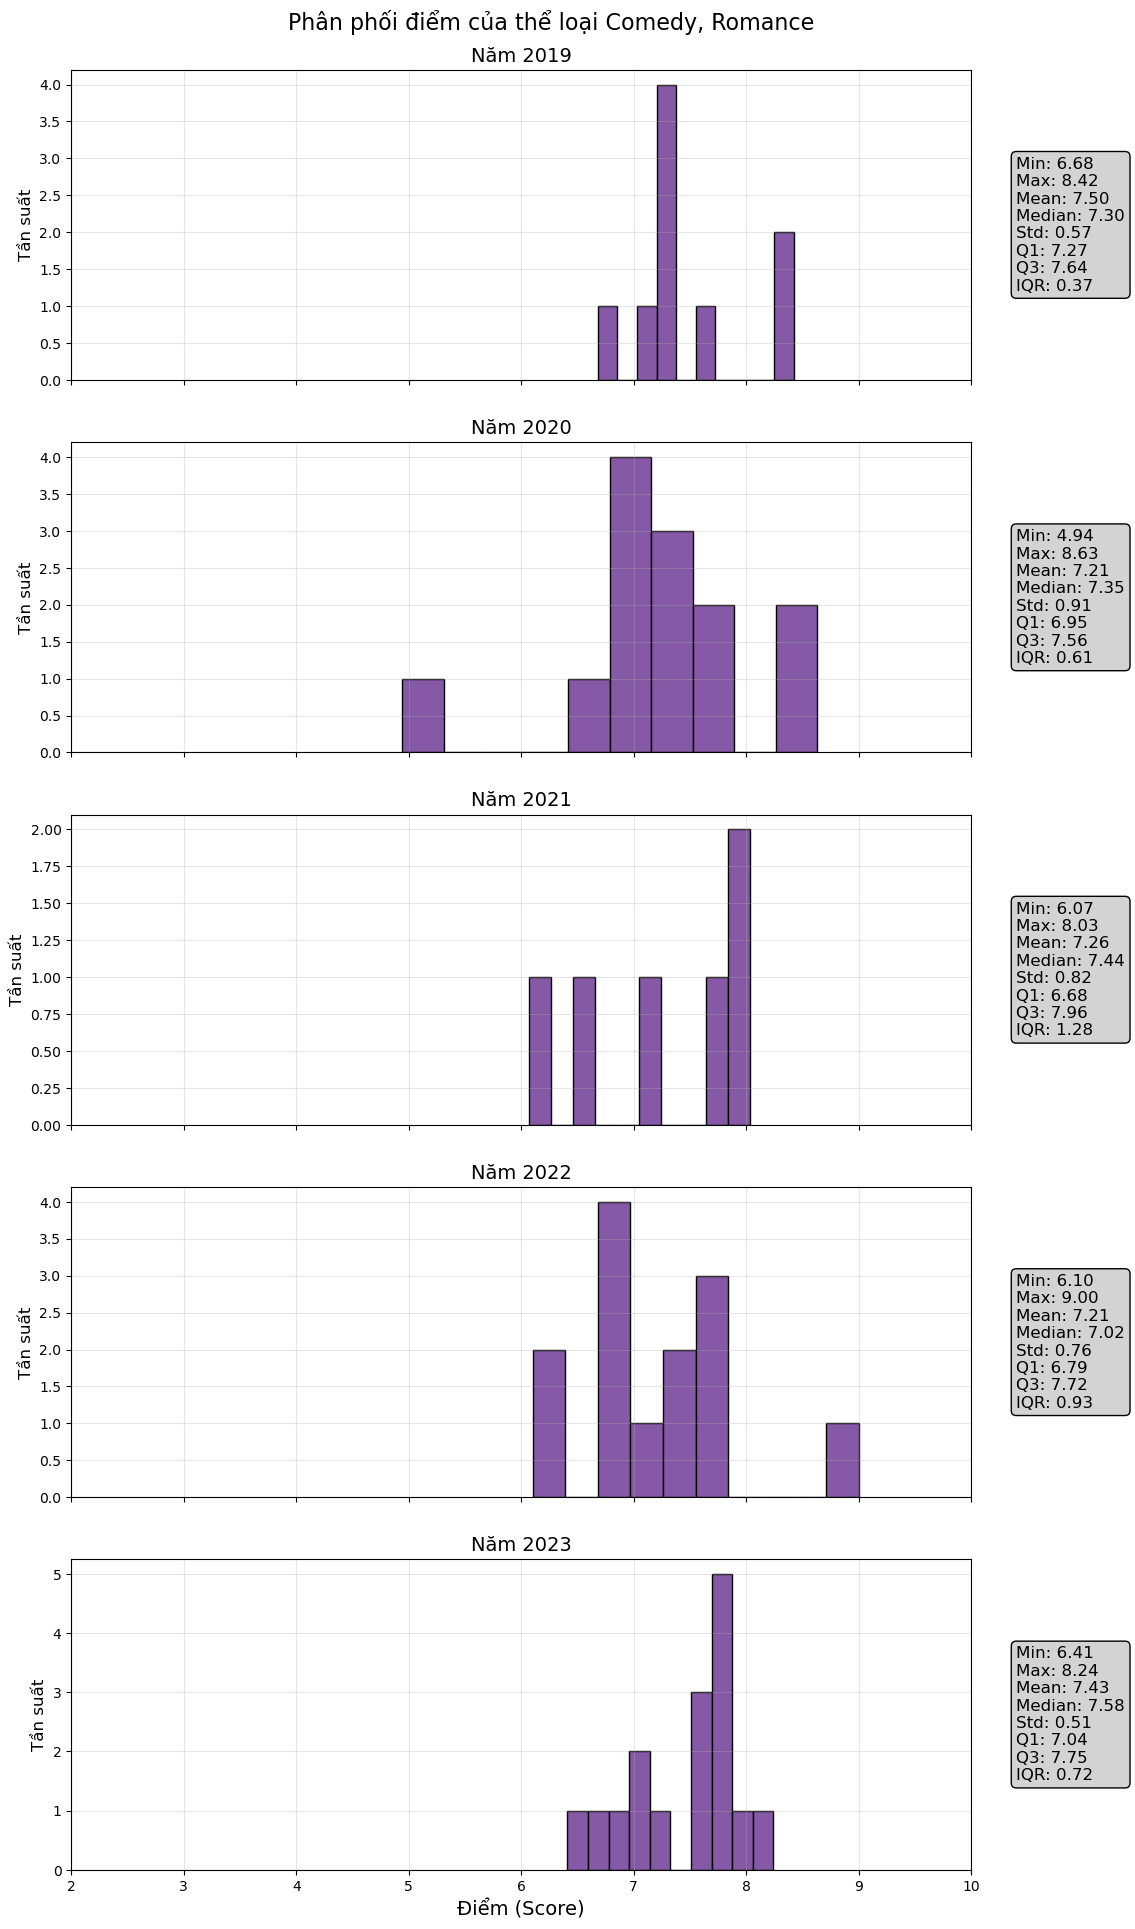

In [18]:
genre = 'Comedy, Romance'
histogram_over_years(genre, colors[4])

1. Phân phối điểm:
- Năm 2019, phạm vi điểm chủ yếu rơi vào khoảng từ 7.2 đến 7.6, với độ lệch chuẩn (Std) thấp, điều này thể hiện mức độ đánh giá ổn định và ít biến động giữa các phim.
- Năm 2020 và 2021, phạm vi điểm mở rộng từ 6.9 đến 8.0, cho thấy có thêm các bộ phim nổi bật, làm tăng giá trị trung bình và mở rộng khoảng phân phối.
- Đỉnh cao trong năm 2023:
- Điểm trung bình trong năm 2023 là 7.43, đạt mức cao so với các năm trước. Đồng thời, phạm vi điểm chủ yếu từ 7.0 đến 8.0, cho thấy sự nhất quán trong chất lượng các bộ phim thuộc tổ hợp thể loại này.
- Độ lệch chuẩn trong năm 2023 giảm (Std = 0.51), chứng tỏ các đánh giá của người dùng tập trung hơn.

2. Sự bất thường ở năm 2020:
- Năm 2020 xuất hiện một khoảng điểm từ 4.94 đến 6.0, thấp hơn các năm khác. Điều này có thể do một số bộ phim không đạt được kỳ vọng, ảnh hưởng đến điểm tổng thể.
3. So sánh các năm:
- 2019: Điểm trung bình: 7.50, là một năm có sự ổn định trong phân phối điểm với mức độ lệch chuẩn thấp (0.57). Phim hầu hết được đánh giá tốt với điểm vượt 7.2.
- 2020: Điểm trung bình: 7.21, phạm vi mở rộng đáng kể với cả điểm cao và thấp. Một số phim có điểm dưới 6.0, cho thấy sự phân hóa về chất lượng sản phẩm.
- 2021–2022: Điểm trung bình tiếp tục tăng nhẹ lên 7.26 và 7.21, với sự tập trung vào các phim có chất lượng cao. Các phim thuộc phân vị thứ ba (Q3) tăng rõ rệt, phản ánh những bộ phim tốt nhất có điểm vượt trội.
- 2023: Điểm trung bình cao nhất với mức 7.43, thể hiện mức độ ổn định cao. Các phim tập trung vào phân vị 7.0–7.8, cho thấy sự cải thiện về mặt sản xuất và đáp ứng tốt hơn kỳ vọng của khán giả.
4. Tổng kết: 
- Sự cải thiện và ổn định: Tổ hợp thể loại Comedy, Romance cho thấy sự ổn định qua các năm với điểm trung bình từ 7.2 trở lên, đặc biệt đạt đỉnh cao vào năm 2023.
- Tiềm năng phát triển: Với xu hướng gia tăng đánh giá tích cực và phạm vi điểm được thu hẹp, tổ hợp thể loại này có tiềm năng phát triển mạnh mẽ hơn trong tương lai.